Alaina Rose Plaza || 3 BS Applied Mathematics || LSTM RNN Code

AMAT 191 Machine Learning Course Requirement

Data Preprocessing

Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('bmh')

import datetime

Data Source: Ford Motor Company. 
Downloaded from Yahoo Finance.
Link: https://finance.yahoo.com/quote/F/history?p=F

In [2]:
Fstocks = pd.read_csv("C:\\Users\\acer\\Desktop\\ml\\FTrain.csv", index_col= "Date" , parse_dates= True)

In [3]:
Fstocks.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-20,12.55,12.64,12.45,12.59,8.491675,43705700.0
2012-01-23,12.69,12.84,12.55,12.66,8.538893,49379700.0
2012-01-24,12.56,12.86,12.46,12.82,8.646807,45768400.0
2012-01-25,12.80,12.98,12.70,12.93,8.721000,54021600.0
2012-01-26,13.03,13.05,12.66,12.79,8.626574,75470700.0


In [4]:
Fstocks.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-24,9.44,9.49,9.43,9.47,9.264988,11881600.0
2019-12-26,9.47,9.49,9.43,9.45,9.245420,28961300.0
2019-12-27,9.45,9.46,9.35,9.36,9.157369,28272800.0
2019-12-30,9.34,9.35,9.23,9.25,9.049750,36074900.0
2019-12-31,9.25,9.33,9.25,9.30,9.098668,32342100.0


Data Visualization

Ford Stock Prices from Jan 2012 to Jan 2019

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected=True)

layout = go.Layout (
    title = 'Ford Stock Prices',
    xaxis = dict(
        title = 'Days'
    )
)

stocks_data = [{'y':Fstocks ['Close']}]
plot = go.Figure(data = stocks_data, layout=layout)

iplot(plot)

Data Cleaning: Check for missing values

In [6]:
Fstocks.isna().any()


Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

The Isna() function helps detect missing values. Since it returned "False", there are no missing values.

Finding the Outliers

<function matplotlib.pyplot.show(close=None, block=None)>

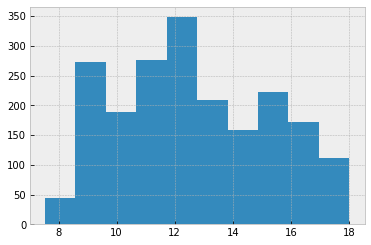

In [7]:
plt.hist(Fstocks['Open'])
plt.show

Quantile Method for Finding Outliers

In [8]:
lowerlimit = Fstocks['Open'].quantile(0.05)
lowerlimit

8.849499999999999

In [9]:
Fstocks[Fstocks['Open'] < lowerlimit]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-11-10,8.82,8.99,8.76,8.81,7.940022,66170800.0
2018-10-15,8.67,8.85,8.66,8.81,7.940022,40183200.0
2018-10-17,8.80,8.86,8.64,8.76,7.894960,48795100.0
2018-10-18,8.74,8.76,8.50,8.51,7.669646,59669200.0
2018-10-19,8.32,8.53,8.19,8.50,7.660634,59831100.0
...,...,...,...,...,...,...
2019-10-30,8.64,8.64,8.52,8.54,8.355121,28685300.0
2019-10-31,8.58,8.60,8.50,8.59,8.404039,29124100.0
2019-01-11,8.64,8.93,8.64,8.89,8.697544,55354900.0


In [10]:
upperlimit = Fstocks['Open'].quantile(0.95)
upperlimit

17.040001

In [11]:
Fstocks[Fstocks['Open'] > upperlimit]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-07-15,17.240000,17.290001,17.100000,17.120001,11.936357,26663500.0
2013-07-23,17.160000,17.170000,16.820000,16.940001,11.810863,35016900.0
2013-07-24,17.480000,17.680000,17.250000,17.370001,12.110667,78608500.0
2013-07-25,17.260000,17.270000,16.879999,16.959999,11.824806,51510200.0
2013-07-29,17.080000,17.190001,17.049999,17.080000,11.908470,27823400.0
...,...,...,...,...,...,...
2014-08-29,17.469999,17.490000,17.389999,17.410000,12.564321,15373400.0
2014-02-09,17.480000,17.620001,17.480000,17.600000,12.701437,18538300.0
2014-03-09,17.709999,17.870001,17.440001,17.469999,12.607621,25723900.0


Removing Outliers

In [12]:
Fstocks = Fstocks[(Fstocks['Open'] > lowerlimit) & (Fstocks['Open'] < upperlimit)]
Fstocks

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-20,12.55,12.64,12.45,12.59,8.491675,43705700.0
2012-01-23,12.69,12.84,12.55,12.66,8.538893,49379700.0
2012-01-24,12.56,12.86,12.46,12.82,8.646807,45768400.0
2012-01-25,12.80,12.98,12.70,12.93,8.721000,54021600.0
2012-01-26,13.03,13.05,12.66,12.79,8.626574,75470700.0
...,...,...,...,...,...,...
2019-12-24,9.44,9.49,9.43,9.47,9.264988,11881600.0
2019-12-26,9.47,9.49,9.43,9.45,9.245420,28961300.0
2019-12-27,9.45,9.46,9.35,9.36,9.157369,28272800.0


Creating a training set dataframe

In [13]:
training = Fstocks['Open']
training = pd.DataFrame(training)

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_scaled = sc.fit_transform(training)

Feature Construction

Creating a data structure

In [15]:
X_train = []
Y_train = []

for i in range (60 , 1798):
    X_train.append(training_scaled[i-60:i,0])
    Y_train.append(training_scaled[i,0])
X_train,Y_train = np.array(X_train), np.array(Y_train)


Reshaping

In [16]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

Feature Selection and Transfomation

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Assign the data to regressor

In [18]:
regressor = Sequential()

Model Training

First LSTM Layer & Dropout Regularisation

In [19]:
regressor.add(LSTM(units=50, return_sequences= True, input_shape =(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

Second LSTM Layer & Dropout Regularisation

In [20]:
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

Third LSTM Layer & Dropout Regularisation

In [21]:
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

Fourth LSTM Layer & Dropout Regularisation

In [22]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

Output Layer

In [23]:
regressor.add(Dense(units=1))

Compile the RNN

In [24]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')

Fit the RNN to the Training Set

In [25]:
regressor.fit(X_train, Y_train, epochs = 20, batch_size=32)

Epoch 1/20
55/55 [==============================] - 23s 90ms/step - loss: 0.0335
Epoch 2/20
55/55 [==============================] - 7s 120ms/step - loss: 0.0102
Epoch 3/20
55/55 [==============================] - 6s 106ms/step - loss: 0.0083
Epoch 4/20
55/55 [==============================] - 5s 87ms/step - loss: 0.0072
Epoch 5/20
55/55 [==============================] - 5s 89ms/step - loss: 0.0074
Epoch 6/20
55/55 [==============================] - 4s 81ms/step - loss: 0.0066
Epoch 7/20
55/55 [==============================] - 4s 71ms/step - loss: 0.0071
Epoch 8/20
55/55 [==============================] - 4s 72ms/step - loss: 0.0059
Epoch 9/20
55/55 [==============================] - 4s 73ms/step - loss: 0.0061
Epoch 10/20
55/55 [==============================] - 4s 70ms/step - loss: 0.0054
Epoch 11/20
55/55 [==============================] - 4s 70ms/step - loss: 0.0050: 0s - loss: 0.005
Epoch 12/20
55/55 [==============================] - 4s 71ms/step - loss: 0.0051
Epoch 13/20
55/5

Making the predictions and visualizing the results

In [26]:
Fstocks_test = pd.read_csv("C:\\Users\\acer\\Desktop\\ml\\FTest.csv", index_col= "Date" , parse_dates= True)

In [27]:
real_stock_price = Fstocks_test.iloc[:,1:2].values

In [28]:
Fstocks_test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-01,9.29,9.42,9.19,9.42,9.216070,43425700.0
2020-03-01,9.31,9.37,9.15,9.21,9.010616,45040800.0
2020-06-01,9.10,9.17,9.06,9.16,8.961699,43372300.0
2020-07-01,9.20,9.25,9.12,9.25,9.049750,44984100.0
2020-08-01,9.23,9.30,9.17,9.25,9.049750,45994900.0


In [29]:
Testing = Fstocks_test['Open']
Testing = pd.DataFrame(Testing)


Getting the predicted stock price of 2020 - 2022

In [30]:
Fstocks_total = pd.concat((Fstocks['Open'],Fstocks_test['Open']), axis=0)
inputs = Fstocks_total[len(Fstocks_total)-len(Fstocks_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

for i in range (60, 578):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


C:\Users\acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



In [31]:
predicted_stock_price = pd.DataFrame(predicted_stock_price)

Visualizing the results

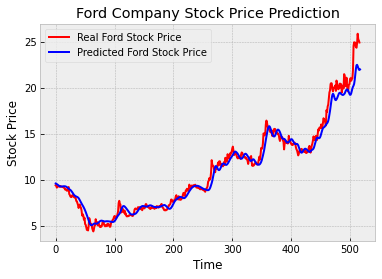

In [32]:
plt.plot(real_stock_price, color = 'red', label = 'Real Ford Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Ford Stock Price')
plt.title('Ford Company Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [33]:
real_stock_price = pd.DataFrame(real_stock_price)

In [34]:
real_stock_price

,0
0,9.420000
1,9.370000
2,9.170000
3,9.250000
4,9.300000
...,...
512,24.840000
513,25.870001
514,25.280001
515,25.129999


In [35]:
predicted_stock_price.drop([517], axis = 0, inplace = True)
predicted_stock_price

,0
0,9.617020
1,9.593129
2,9.555469
3,9.506635
4,9.451668
...,...
512,22.499504
513,22.350435
514,22.149693
515,21.982487


Model Evaluation

In [36]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from math import sqrt

In [37]:
mse1 = mse(real_stock_price,predicted_stock_price)
mse1


0.6820660014822711

In [38]:
mae1 = mae(real_stock_price,predicted_stock_price)
mae1 

0.5508723004466192

In [39]:
rmse =sqrt(mse1)
rmse


0.8258728724702556